# Library

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow  as tf 
from keras import Sequential 
from keras.layers import Dense
from keras.datasets import mnist
#import tensorflow_datasets as tfds
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from tensorflow.keras.models import Sequential

# Dataset Loading

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
len(x_train)

60000

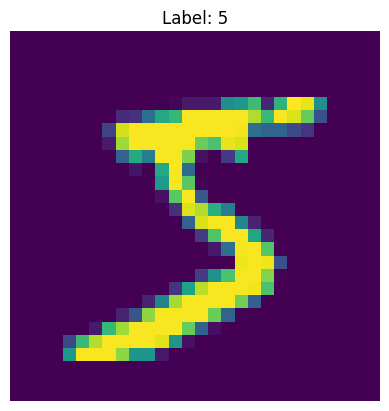

In [20]:
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

# Normalization

In [21]:
x_train = x_train.reshape(-1, 28*28) / 255
x_test = x_test.reshape(-1, 28*28) / 255

# Define the Neural Network Architecture

In [24]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer
    Dense(64, activation='relu'),                         # Hidden layer
    Dense(10, activation='softmax')                       # Output layer
])

# Compile the Model

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model

In [26]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10


2025-04-23 20:28:07.792287: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 141120000 exceeds 10% of free system memory.


1392/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8564 - loss: 0.4890

2025-04-23 20:28:15.046223: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8571 - loss: 0.4866 - val_accuracy: 0.9554 - val_loss: 0.1545
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9631 - loss: 0.1225 - val_accuracy: 0.9639 - val_loss: 0.1191
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0761 - val_accuracy: 0.9671 - val_loss: 0.1120
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9827 - loss: 0.0547 - val_accuracy: 0.9706 - val_loss: 0.1028
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0426 - val_accuracy: 0.9697 - val_loss: 0.1096
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9705 - val_loss: 0.1054
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9668 - val_loss: 0.1268
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accurac

# Evaluate the model's performance on the test data

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"{test_loss}")
test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9703 - loss: 0.1114
0.10010220855474472


0.9745000004768372

# Predict on the test set

In [29]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
y_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Comput the confusion matrix

In [31]:
cm = confusion_matrix(y_test, y_classes)

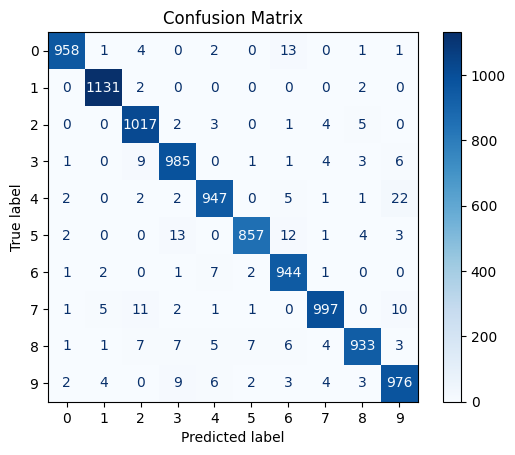

In [32]:
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
dis.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()